In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy
def linearArray(N,theta=numpy.linspace(0,180,720),theta0=90,w=None,kd=numpy.pi):
    '''
    Simple pattern of a linear array as a function of theta
    Inputs:
    N: Number of antennas
    theta: Angles to plot (in degrees)
    w: weights (possibly complex valued). Use None to default to uniform
    theta0: nominal steering angle (in degrees)
    kd: Wavenumber times antenna spacing (in radians). Default of pi corresponds to d=lambda/2
    '''
    
    #default to uniform weights if it is not given
    if w is None:
        w=numpy.ones(N)
        
    #Add linear phase progrestion to steer to nominal angle theta0
    th0=numpy.radians(theta0)
    nn=numpy.arange(N)
    w=w*numpy.exp(-1j*nn*kd*numpy.cos(th0))
        
    #positions of the antennas (in units of "d")
    zs=numpy.arange(-(N-1)//2,(N+1)//2,1.0)
    
    ArrFac=numpy.zeros(theta.shape)
    th=numpy.radians(theta)
    for n in range(N):
        ArrFac=ArrFac+w[n]*numpy.exp(1j*kd*zs[n]*numpy.cos(th))
        
    ArrFacSq=numpy.abs(ArrFac)**2
    
    #Normalize the patterns
    ArrFacSq=ArrFacSq/N**2
    
    return ArrFacSq,theta

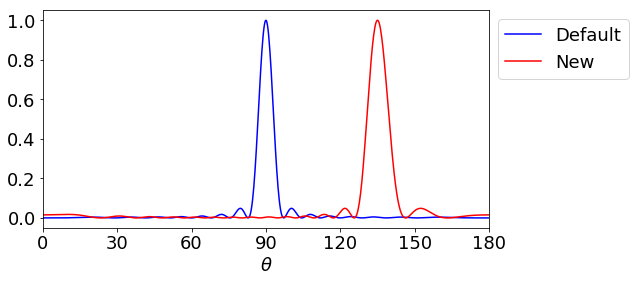

In [3]:
#Default
Fsq1,theta1=linearArray(16,theta0=90,kd=numpy.pi)
#New
Fsq2,theta2=linearArray(16,theta0=135,kd=numpy.pi)

plt.rcParams['figure.figsize']=8,4
plt.rcParams['font.size']=18
plt.plot(theta1,Fsq1,'b',label='Default')
plt.plot(theta2,Fsq2,'r',label='New')
plt.xlim([0,180])
plt.xticks(numpy.arange(0,180+30,30))
plt.xlabel(r'$\theta$')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

## Exercises

1. Use theta=90 and kd=numpy.pi for both the Default and New cases. Use N=16 for the Default and try different values of N for the "new"

N=4, N=8, N=32

2. Use N=16 and theta0=90 for both the Default and New cases. For kd use numpy.pi for the "default," and try different values of kd for the new:

kd=numpy.pi/2.0, kd=3 * numpy.pi/4.0, kd=3 * numpy.pi/2.0, kd=2 * numpy.pi, kd=3 * numpy.pi

3. Use N=16 and kd=5 * numpy.pi/4.0 for both the Default and New cases. For theta0 use 90 for the "default," and try different values of theta0 for the new:

theta0=100, theta0=120, theta0=135, theta0=150

4. Use N=16, kd=numpy.pi, and theta0=90 for both cases. For the "new" case turn off every other antenna by using

w=numpy.array([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])

5. Use N=16, kd=numpy.pi, and theta0=90 for both cases. For the "new" case flip the phase of every other antenna by using 

w=numpy.array([1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1])